_precision_score, recall_score, FNR, FPR_

_Save Model With Metrics for final trainig._

_Better Explain Evaluation and Business Metric_

## Agenda

[Cycles](#Cycles)<br>

&emsp;[0.0 Imports](#0.0-Imports)<br>
&emsp;&emsp;[0.1 Helper Functions](#0.1-Helper-Functions)<br>
&emsp;&emsp;[0.2 Loading Data](#0.2-Loading-Data)<br>
&emsp;&emsp;[* Split Modeling and Validation Data](#*-Split-Modeling-and-Validation-Data)<br>

&emsp;[1.0 Data Preparation](#1.0-Data-Preparation)<br>
&emsp;&emsp;[1.1 Rename Columns](#1.1-Rename-Columns)<br>
&emsp;&emsp;[1.2 Feature Engineering](#1.2-Feature-Engineering)<br>
&emsp;&emsp;&emsp;[1.2.1. customer_type](#1.2.1.-customer_type)<br>
&emsp;&emsp;&emsp;[1.2.2. balance_plus](#1.2.2.-balance_plus)<br>
&emsp;&emsp;&emsp;[1.2.3. balance_minus](#1.2.3.-balance_minus)<br>
&emsp;&emsp;[1.3 Dropping Features](#1.3-Dropping-Features)<br>
&emsp;&emsp;[1.4 Feature Encoding](#1.4-Feature-Encoding)<br>
&emsp;&emsp;[1.5 Rescaling](#1.5-Rescaling)<br>


&emsp;[2.0 Train Test Split](#2.0-Train-Test-Split)<br>

&emsp;[3.0 Models](#3.0-Models)<br>
&emsp;&emsp;[3.1 LogisticRegression](#3.1-LogisticRegression)<br>
&emsp;&emsp;[3.2 RandomForest](#3.2-RandomForest)<br>

&emsp;[4.0 Oversampling](#4.0-Oversampling)<br>
&emsp;&emsp;[4.1 LogisticRegression](#4.1-LogisticRegression)<br>
&emsp;&emsp;[4.2 RandomForest](#4.2-RandomForest)<br>

&emsp;[5.0 Validation Data](#5.0-Validation-Data)<br>
&emsp;&emsp;[5.1 Evaluation](#5.1-Evaluation)<br>
&emsp;&emsp;[5.2 Changing Threshold](#5.2-Changing-Threshold)<br>

&emsp;[6.0 Cross Validate (if there's time)](#6.0-Cross-Validate)<br>



## Cycles

### 1st

- **Feature Engineering**: customer_type, balance_plus, balance_minus.

- **Dropped Columns:** name_orig, newbalance_orig, name_dest, newbalance_dest.

    
> **Sample Data:**
    
            LogisticRegression()
                Precision: .22    Recall: .80    F1: .34

            RandomForest(min_samples_leaf=5, n_estimators=500)
                Precision: 1    Recall: 1    F1: 1


        Cross Validation:
        
            RandomForest(min_samples_leaf=5, n_estimators=500)
                Precision: .99    Recall: .99    F1: .99


        OverSampling:

            LogisticRegression()
                Precision: .21    Recall: .79    F1: .34

            RandomForest(min_samples_leaf=5, n_estimators=500)
                Precision: 1    Recall: 1    F1: 1
     
     
**Validation Set**:
        
            RandomForest(min_samples_leaf=5, n_estimators=500)
                    Precision: .74   Recall: .59   F1: .65
    
### 2nd

- **Also dropping:** is_flagged_fraud, customer_orig_type, customer_dest_type.


> **Complete Dataset:**
    
            LogisticRegression()             

                Precision: .01    Recall: .70    F1: .02

            RandomForest(min_samples_leaf=5, n_estimators=500)
                Precision: 1    Recall: 1     F1: 1
        

        OverSampling:
        
            LogisticRegression()  
                Precision: .01     Recall: .70    F1: .02 



**Validation Set**:
        
            RandomForest(min_samples_leaf=5, n_estimators=500)
                Precision: .99    Recall: .37    F1: .54 

## 0.0 Imports

In [1]:
from notebook_utils.os import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import inflection

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score

from sklearn.model_selection import cross_validate

from IPython.display import Image

%matplotlib inline

In [2]:
directory = Directory("1.0-pr-fraud-detection-ml")

### 0.1 Helper Functions

In [3]:
def train_test_model(model, X_train, X_test, y_train, y_test, return_predictions=True):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['Fraud', 'Non Fraud']))
    if return_predictions:
        return y_pred

### 0.2 Loading Data

##### * Split Modeling and Validation Data

In [4]:
# raw_data = pd.read_csv(join_paths([directory.DATA_DIR, 'raw', 'PS_20174392719_1491204439457_log.csv']))
# raw_data.head()

# X = raw_data.drop(columns=['isFraud'])
# Y = raw_data['isFraud']

# x_modeling, x_validation, y_modeling, y_validation = train_test_split(X, Y, test_size=.2, random_state=42)

# pd.concat([x_modeling, y_modeling], axis=1).to_csv(join_paths([directory.DATA_DIR, 'raw', 'train.csv']), index=False)
# pd.concat([x_validation, y_validation], axis=1).to_csv(join_paths([directory.DATA_DIR, 'raw', 'validation.csv']), index=False)

**Loading Training Data**

In [5]:
%%time
raw_data = pd.read_csv(join_paths([directory.DATA_DIR, 'raw', 'train.csv']), low_memory=False)
raw_data.head()

Wall time: 52.4 s


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,619,CASH_IN,386385.08,C421351828,4669568.85,5055953.92,C1977099364,506035.06,119649.98,0,0
1,164,CASH_IN,212458.78,C83569848,234635.00,447093.78,C1690589535,806037.88,593579.10,0,0
2,382,PAYMENT,19967.60,C852995095,3634.00,0.00,M1695416333,0.00,0.00,0,0
3,180,CASH_OUT,527616.51,C61761046,180216.00,0.00,C577654587,92157.10,619773.61,0,0
4,36,TRANSFER,206067.85,C758004147,0.00,0.00,C2143015292,2131494.48,2337562.32,0,0


## 1.0 Data Preparation

In [6]:
# Sample to faster tests
df1 = raw_data[raw_data['isFraud'] == False].sample(20000)
df2 = raw_data[raw_data['isFraud'] == True].sample(1000)
data = pd.concat([df1, df2])


# data = raw_data.copy()

pd.concat([data['isFraud'].value_counts(), data['isFraud'].value_counts(normalize=True)], axis=1)

,isFraud,isFraud
0,5083503,0.998705
1,6593,0.001295


### 1.1 Rename Columns

In [7]:
snakecase = lambda x: inflection.underscore(x)
data.columns = map(snakecase, data.columns)

### 1.2 Feature Engineering

#### 1.2.1. customer_type

_"Note that there is not information for customers that start with M (Merchants)."_

M = Merchants

C = Clients?

In [8]:
data['customer_orig_type'] = data['name_orig'].apply(lambda string: string[0])
data['customer_dest_type'] = data['name_dest'].apply(lambda string: string[0])

#### 1.2.2. balance_plus

In [9]:
data['balance_plus_orig'] = data['oldbalance_org'] + data['amount']
data['balance_plus_dest'] = data['oldbalance_dest'] + data['amount']

#### 1.2.3. balance_minus

In [10]:
data['balance_minus_orig'] =  data['oldbalance_org'] - data['amount']
data['balance_minus_dest'] = data['oldbalance_dest'] - data['amount']

### 1.3 Dropping Features

> **Delete Features We can't use such as ID, Name...**

**nameOrig** - customer who started the transaction<br>
**nameDest** - customer who is the recipient of the transaction<br>


    We don't have these information at prediction time.
    We could estimate them by adding or subtracting the transaction amount from balance, 
    but first, We would have to know if this is a valid option, since there are data as:
    
    type   - PAYMENT 
    amount - 2459.70
    oldbalanceOrg  - 0
    newbalanceOrig - 0
    oldbalanceDest - 0
    newbalanceDest - 0
    isFraud - False
    
    Let's try modeling without them first. And if needed, We'll analyze the data again to 
    confirm that option.
    
**newbalanceOrig** - new balance after the transaction<br>
**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).<br>

In [11]:
to_drop = ['name_orig', 'newbalance_orig', 'name_dest', 'newbalance_dest', 
           'is_flagged_fraud', 'customer_orig_type', 'customer_dest_type']
data.drop(columns=to_drop, inplace=True)

### 1.4 Feature Encoding

In [12]:
type_encoder = LabelEncoder()
# customer_orig_type_encoder = LabelEncoder()
# customer_dest_type_encoder = LabelEncoder()

data['type'] = type_encoder.fit_transform( data['type'] )
# data['customer_orig_type'] = customer_orig_type_encoder.fit_transform( data['customer_orig_type'] )
# data['customer_dest_type'] = customer_dest_type_encoder.fit_transform( data['customer_dest_type'] )

### 1.5 Rescaling

In [13]:
robust_scaler = RobustScaler()
cols = data.columns
data = robust_scaler.fit_transform(data)
data = pd.DataFrame(data, columns=cols)

## 2.0 Train Test Split

In [14]:
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
pd.concat([y_train.value_counts(), y_train.value_counts(normalize=True)], axis=1)

,is_fraud,is_fraud
0.0,3558447,0.998703
1.0,4620,0.001297


In [16]:
pd.concat([y_test.value_counts(), y_test.value_counts(normalize=True)], axis=1)

,is_fraud,is_fraud
0.0,1525056,0.998708
1.0,1973,0.001292


## 3.0 Models

### 3.1 LogisticRegression

In [17]:
%%time 
# Sample 189ms

lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=500)
train_test_model(lr, X_train, X_test, y_train, y_test, return_predictions=False)

              precision    recall  f1-score   support

       Fraud       1.00      0.89      0.94   1525056
   Non Fraud       0.01      0.70      0.02      1973

    accuracy                           0.89   1527029
   macro avg       0.50      0.80      0.48   1527029
weighted avg       1.00      0.89      0.94   1527029

Wall time: 51.9 s


### 3.2 RandomForest

In [18]:
%%time 
# Sample 6.4s

rf = RandomForestClassifier(n_jobs=-1, random_state=42, min_samples_leaf=5, n_estimators=500)
train_test_model(rf, X_train, X_test, y_train, y_test, return_predictions=False)

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00   1525056
   Non Fraud       1.00      1.00      1.00      1973

    accuracy                           1.00   1527029
   macro avg       1.00      1.00      1.00   1527029
weighted avg       1.00      1.00      1.00   1527029

Wall time: 1h 57min 17s


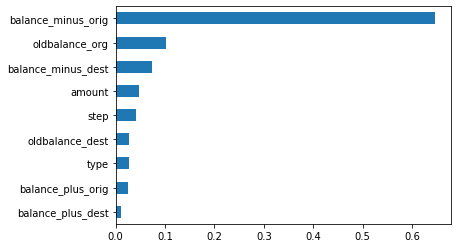

In [19]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values()
feature_importances.plot.barh();

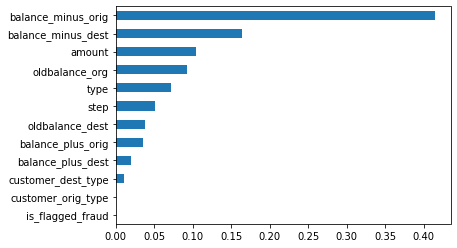

In [20]:
Image(join_paths([directory.BASE_DIR, "images", "feature_importances_sample_data_cycle1.PNG"]))

## 4.0 Oversampling

In [21]:
oversample = SMOTE(sampling_strategy=.6)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

**Target Percentage**

In [22]:
y_train.sum() / len(y_train)

0.0012966357354492633

In [23]:
y_train_over.sum() / len(y_train_over)

0.374999978045197

#### Undersampling

### 4.1 LogisticRegression

In [24]:
# lr_over = LogisticRegression(random_state=42, class_weight='balanced', max_iter=500)
# train_test_model(lr_over, X_train_over, X_test, y_train_over, y_test, return_predictions=False)

### 4.2 RandomForest

In [25]:
# rf_over = RandomForestClassifier(n_jobs=-1, random_state=42, min_samples_leaf=5, n_estimators=500)
# train_test_model(rf_over, X_train_over, X_test, y_train_over, y_test, return_predictions=False)

In [26]:
# pd.Series(rf_over.feature_importances_, index=X_train_over.columns).sort_values().plot.barh();

## 5.0 Validation Data

In [27]:
validation = pd.read_csv(join_paths([directory.DATA_DIR, 'raw', 'validation.csv']), low_memory=False)
validation.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [28]:
snakecase = lambda x: inflection.underscore(x)
validation.columns = map(snakecase, validation.columns)

**Feature Engineering**

In [29]:
validation['customer_orig_type'] = validation['name_orig'].apply(lambda string: string[0])
validation['customer_dest_type'] = validation['name_dest'].apply(lambda string: string[0])

validation['balance_plus_orig'] = validation['oldbalance_org'] + validation['amount']
validation['balance_plus_dest'] = validation['oldbalance_dest'] + validation['amount']

validation['balance_minus_orig'] =  validation['oldbalance_org'] - validation['amount']
validation['balance_minus_dest'] = validation['oldbalance_dest'] - validation['amount']

In [30]:
validation.drop(columns=to_drop, inplace=True)

**Feature Transformation**

In [31]:
validation['type'] = type_encoder.transform( validation['type'] )
# validation['customer_orig_type'] = customer_orig_type_encoder.transform( validation['customer_orig_type'] )
# validation['customer_dest_type'] = customer_dest_type_encoder.transform( validation['customer_dest_type'] )

cols = validation.columns
validation = robust_scaler.fit_transform(validation)
validation = pd.DataFrame(validation, columns=cols)

### 5.1 Evaluation

In [32]:
X_valid, y_valid = validation.drop(columns=["is_fraud"]), validation["is_fraud"]

In [33]:
predictions = rf.predict(X_valid)
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1270904
         1.0       1.00      0.37      0.54      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



Transactions


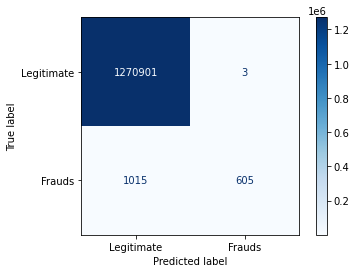

In [45]:
print("Transactions")
plot_confusion_matrix(rf, X_valid, y_valid, values_format='d', display_labels=['Legitimate', 'Frauds'], cmap='Blues')
plt.show()

In [47]:
tn, fp, fn, tp = confusion_matrix(y_valid, predictions).ravel()

In [49]:
# False Negative Rate
fn / (fn+tp)

0.6265432098765432

### 5.2 Changing Threshold

In [37]:
proba = rf.predict_proba(X_valid)

In [38]:
threshold = pd.concat([y_valid.reset_index(), pd.Series(predictions, name='prediction') , pd.Series(proba[:,1], name='fraud_probability')], axis=1)
threshold['final_prediction'] = threshold['fraud_probability'].apply(lambda proba: 1 if proba > .75 else 0)

In [39]:
print(classification_report(y_valid, threshold['final_prediction']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1270904
         1.0       1.00      0.19      0.31      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.59      0.66   1272524
weighted avg       1.00      1.00      1.00   1272524



In [40]:
print("Transactions")
confusion_matrix(y_valid, threshold['final_prediction'])

Transactions


array([[1270903,       1],
       [   1318,     302]], dtype=int64)

In [54]:
tn, fp, fn, tp = confusion_matrix(y_valid, threshold['final_prediction']).ravel()

In [55]:
# False Negative Rate
fn / (fn+tp)

0.8135802469135802

## 6.0 Cross Validate 

We can do this if We have enough time.

In [43]:
# scores = cross_validate(rf, X, y, cv=10, scoring=('precision', 'recall', 'f1'), n_jobs=-1)
# scores = pd.DataFrame(scores)

# scores = pd.concat([pd.DataFrame(scores.mean(), columns=['mean']).T, scores])
# scores